# E-commerce website 'Wish' Summer Clothes Sale EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandasql as ps

## Reading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\Twinkle Sahni\Downloads\jfreex-summer-products-and-sales-performance-in-e-commerce-on-wish\jfreex-summer-products-and-sales-performance-in-e-commerce-on-wish\summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
print("Data shape :",data.shape)

Data shape : (1573, 43)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

## Data Preprocessing

### Dropping the irrelevant features

In [6]:
df = data.copy()

In [7]:
df.drop(['currency_buyer', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
         'product_variation_inventory','has_urgency_banner', 'urgency_text',
         'merchant_title','merchant_info_subtitle','merchant_has_profile_picture', 
         'merchant_profile_picture', 'product_url', 'product_picture', 'theme', 'crawl_month'], axis = 1, inplace = True)

### Cleaning the data

In [8]:
df.isnull().sum()

title                         0
title_orig                    0
price                         0
retail_price                  0
units_sold                    0
uses_ad_boosts                0
rating                        0
rating_count                  0
rating_five_count            45
rating_four_count            45
rating_three_count           45
rating_two_count             45
rating_one_count             45
tags                          0
product_color                41
product_variation_size_id    14
shipping_option_name          0
shipping_option_price         0
shipping_is_express           0
countries_shipped_to          0
inventory_total               0
origin_country               17
merchant_name                 4
merchant_rating_count         0
merchant_rating               0
merchant_id                   0
product_id                    0
dtype: int64

The rating count has zero null values while individual numerical rating count has 45 nulls, implying that for 45 products we do not have segmented ratings which will not be an issue in our analysis. Similarly, 41 items has no information about the color. We can drop these values from our dataset.
Moreover, for 17 merchandise, the country for origin is not known and I think in this case, the null values can be filled using Central Tendency Measures, i.e., Mode. Missing merchant names can just be dopped off the dataset.

In [9]:
df['origin_country'].mode().values

array(['CN'], dtype=object)

In [10]:
df['origin_country'].replace('NaN', 'CN')

0       CN
1       CN
2       CN
3       CN
4       CN
        ..
1568    CN
1569    CN
1570    CN
1571    CN
1572    CN
Name: origin_country, Length: 1573, dtype: object

In [11]:
df = df.dropna()

In [12]:
null1 = df.isnull().sum().to_frame(name='nulls').T
null1

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id
nulls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analyzing the data

In [13]:
df.head(10)

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,...,4,0,34,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,...,2,0,41,50,CN,sarahouse,17752,3.899673,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,...,3,0,36,50,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,5ea10e2c617580260d55310a
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,...,2,0,41,50,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,5cedf17ad1d44c52c59e4aca
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,...,1,0,35,50,CN,happyhorses,14482,4.001588,5ab3b592c3911a095ad5dadb,5ebf5819ebac372b070b0e70
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.0,0.0,...,1,0,40,50,CN,zhoulinglinga,65,3.507692,5e4b9c3801ba9d210036fc5a,5ec645bafd107a02279c8c54
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,50000,0,3.84,6742,3172.0,1352.0,...,2,0,31,50,CN,uniquelifashionshopbb657bfe91d211e598c7063a14d...,10194,4.076516,5652f4053a698c76dc9a3f37,5c63a337d5e2ce4bbb3152cf
7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,1000,0,3.76,286,120.0,56.0,...,3,0,139,50,CN,soband,342,3.681287,5d45349676befe65691dcfbb,5e0ae5ebc2efb76ccf0a3391
8,Robe d'été décontractée à manches courtes pour...,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,100,1,3.47,15,6.0,2.0,...,2,0,36,50,CN,chenxiangjunjun,330,3.803030,5d42980e8388970d32294ddc,5e6f1fb7fe4a5bb4b8bf36e5
9,"Femmes d'été, plus la taille décontractée lâch...",Summer Women Plus Size Casual Loose V Neck Sho...,5.78,22,5000,0,3.60,687,287.0,128.0,...,2,0,33,50,CN,luoweiclothe,5534,3.999819,5ba2251b4315d12ebce873fa,5ccfaf238a8d535cec2dfb47


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1457.0,8.366575,3.893274,1.000000,5.860000,8.000000,11.00000,4.900000e+01
retail_price,1457.0,23.431023,30.868310,1.000000,7.000000,10.000000,26.00000,2.520000e+02
units_sold,1457.0,4339.216884,9037.937218,2.000000,100.000000,1000.000000,5000.00000,1.000000e+05
uses_ad_boosts,1457.0,0.437886,0.496297,0.000000,0.000000,0.000000,1.00000,1.000000e+00
rating,1457.0,3.778758,0.482481,1.000000,3.520000,3.830000,4.08000,5.000000e+00
rating_count,1457.0,886.133837,1928.281899,1.000000,27.000000,166.000000,876.00000,2.074400e+04
rating_five_count,1457.0,430.795470,956.840252,0.000000,11.000000,79.000000,400.00000,1.154800e+04
rating_four_count,1457.0,174.533288,388.128840,0.000000,5.000000,31.000000,168.00000,4.152000e+03
rating_three_count,1457.0,129.252574,295.739698,0.000000,4.000000,24.000000,128.00000,3.658000e+03
rating_two_count,1457.0,60.535347,139.752775,0.000000,2.000000,11.000000,62.00000,2.003000e+03


In [15]:
df.dtypes

title                         object
title_orig                    object
price                        float64
retail_price                   int64
units_sold                     int64
uses_ad_boosts                 int64
rating                       float64
rating_count                   int64
rating_five_count            float64
rating_four_count            float64
rating_three_count           float64
rating_two_count             float64
rating_one_count             float64
tags                          object
product_color                 object
product_variation_size_id     object
shipping_option_name          object
shipping_option_price          int64
shipping_is_express            int64
countries_shipped_to           int64
inventory_total                int64
origin_country                object
merchant_name                 object
merchant_rating_count          int64
merchant_rating              float64
merchant_id                   object
product_id                    object
d

In [16]:
corr = df.corr()
corr

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating
price,1.000000,0.304725,-0.023270,-0.081578,0.075179,-0.001058,0.001092,0.002409,-0.011791,-0.011023,0.005178,0.877472,0.191794,-0.017899,-0.215626,-0.016289,0.033238
retail_price,0.304725,1.000000,0.010911,-0.023671,0.029740,0.045911,0.045099,0.052829,0.039877,0.036334,0.041074,0.264417,0.001284,0.041622,-0.007091,0.050782,0.064949
units_sold,-0.023270,0.010911,1.000000,-0.021297,0.095670,0.903303,0.879508,0.894473,0.900029,0.876017,0.844462,-0.032804,-0.017396,-0.023151,-0.001503,0.228983,0.130975
uses_ad_boosts,-0.081578,-0.023671,-0.021297,1.000000,-0.050130,-0.044384,-0.044013,-0.044705,-0.042433,-0.044041,-0.038070,-0.068404,-0.032723,-0.026952,0.034473,0.029562,-0.032637
rating,0.075179,0.029740,0.095670,-0.050130,1.000000,0.111166,0.154079,0.118200,0.067480,0.025949,-0.012981,0.077416,-0.003748,0.041287,-0.039254,0.066285,0.268140
rating_count,-0.001058,0.045911,0.903303,-0.044384,0.111166,1.000000,0.984322,0.996203,0.981064,0.946772,0.910329,-0.012638,-0.016851,-0.013031,0.001657,0.222432,0.154170
rating_five_count,0.001092,0.045099,0.879508,-0.044013,0.154079,0.984322,1.000000,0.980754,0.933823,0.877409,0.830386,-0.008116,-0.016524,-0.013013,-0.007735,0.228045,0.175754
rating_four_count,0.002409,0.052829,0.894473,-0.044705,0.118200,0.996203,0.980754,1.000000,0.977404,0.937133,0.895174,-0.009597,-0.016534,-0.011980,0.007850,0.222418,0.155769
rating_three_count,-0.011791,0.039877,0.900029,-0.042433,0.067480,0.981064,0.933823,0.977404,1.000000,0.985659,0.951736,-0.024530,-0.016209,-0.008669,0.011409,0.212992,0.122915
rating_two_count,-0.011023,0.036334,0.876017,-0.044041,0.025949,0.946772,0.877409,0.937133,0.985659,1.000000,0.981110,-0.025653,-0.015800,-0.011345,0.013761,0.192236,0.103005


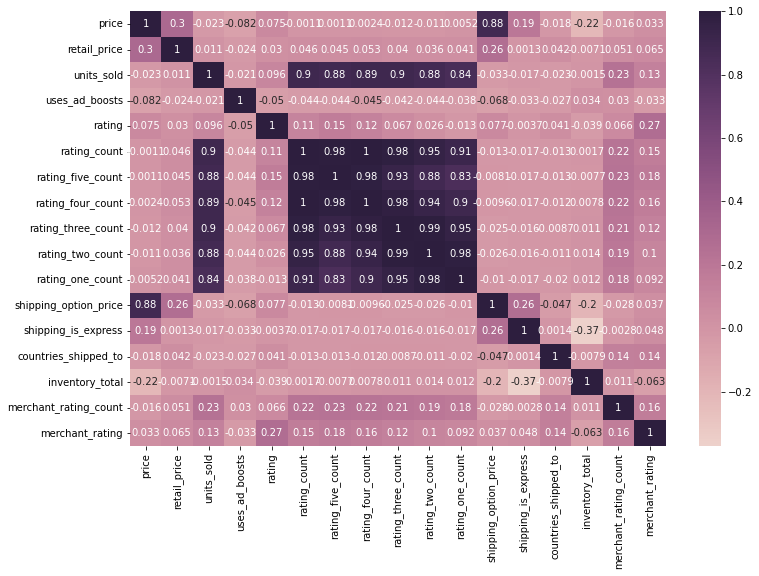

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sns.heatmap(df.corr(), annot=True,  cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

As we can see from the heatmap, the correlation of our target variable, units sold, is the highest (0.9) with number of rating of a product followed by count of rating of a merchant. On the contrary, the correlation between units sold and price is found to be not so strong.

### Units Sold

Getting the distinct values of units_sold to group them for better analysis.

In [18]:
q1= """
SELECT DISTINCT units_sold
FROM df
order by units_sold
"""
query1 = ps.sqldf(q1, locals())
query1

,units_sold
0,2
1,7
2,10
3,50
4,100
5,1000
6,5000
7,10000
8,20000
9,50000


In [19]:
df['units_sold_group'] = df['units_sold'].apply(lambda x: 1 if x <= 100 else 2 if x == 1000 else 3 if x == 5000 else 4 \
                                                if x == 10000 else 5 if x == 20000 else 6 if x == 50000 else 7)
df.units_sold_group

0       1
1       5
2       1
3       3
4       1
       ..
1568    4
1569    1
1570    1
1571    1
1572    1
Name: units_sold_group, Length: 1457, dtype: int64

Groups of units_sold:
1. Less than 100
2. Between 101 and 1000
3. Between 1001 and 5000
4. Between 5001 and 10000
5. Between 10001 and 20000
6. Between 20001 and 50000
7. Between 50001 and 100000

#### Discount

Due to lack of complete information, we will consider the price as discounted price while retail price is the maximum retail price. So, the difference between the two can be accounted a discount given on each product during the summer sale.

In [20]:
df['discount'] = df['retail_price'] - df['price']
df['discount_percn'] = round(df['discount']/df['retail_price'] * 100, 2)
print(df['discount_percn'].head(10))

0   -14.29
1    63.64
2    81.40
3     0.00
4     9.33
5    56.44
6   -16.67
7    -9.09
8    86.90
9    73.73
Name: discount_percn, dtype: float64


In [21]:
corr_sale_discount = df['units_sold'].corr(df['discount'])
corr_sale_discount

0.014288410297255607

The discount feature appears to be only weakly positively correlated with number of units sold.

Text(0.5, 0, 'Units Sold')

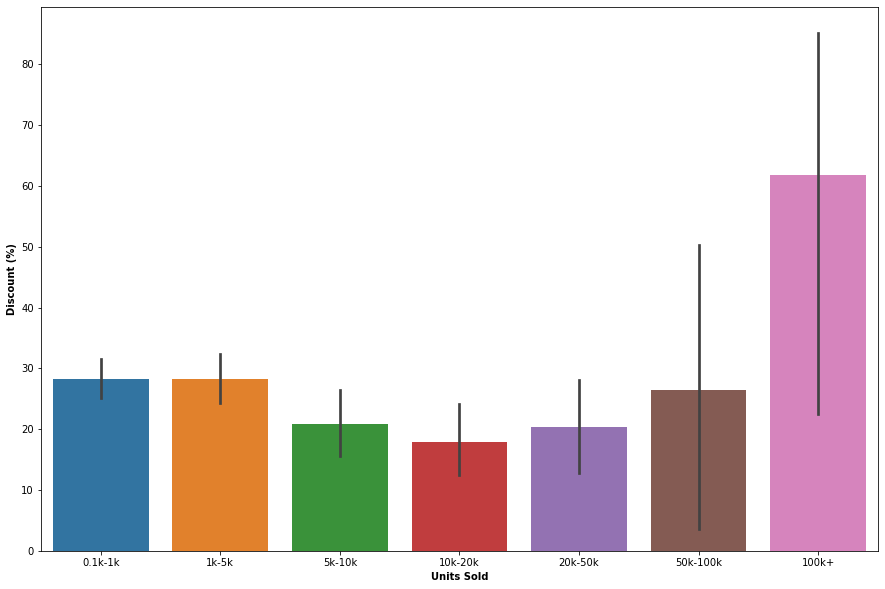

In [22]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = df.units_sold_group, y = df.discount_percn, ax = ax)

units_sold_order = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
ax.set_xticklabels(units_sold_order)
ax.set_ylabel('Discount (%)', fontweight = 'bold')
ax.set_xlabel('Units Sold', fontweight = 'bold')

We can conclude from the above diagram that higher the discount, higher is the number of clothes sold during the sale as this has been also confirmed by the positive correlation between the two. 100k+ units have a discount of nearly 65% while number of products selling between 1k-50k having a discount range of 20%-30%. This notion confirms the price sensitive behaviour of buyers.

#### User Ratings

In this section, we look at 5 most rated and 5 least rated products along with graphical relationship between ratings and number of products sold.

In [23]:
q2 = """
SELECT title as Product_Name, rating_count as Ratings
from df
order by Ratings desc
limit 5 
"""

query2 = ps.sqldf(q2, locals())
pd.set_option('display.max_colwidth', None)
query2

,Product_Name,Ratings
0,Femmes Camisole extensible Spaghetti Strap Long Débardeur Slip Mini Dress 4Color SIZE XXL est disponible maintenant,20744
1,Nouvelle arrivée femmes été sexy robe de soirée élégante sans manches col roulé mini robe,18393
2,2018 New Fashion Women's Tops Sexy Strappy Sleeveless Dentelle sans manches Crop Cops,17980
3,2018 Mode d'été Femmes Débardeurs Débardeurs Femmes Sexy Culottes sans manches Casual Style Femmes Coton Imprimé Dentelle Coutures Irrégulières Blouse Tops（S-5XL),17444
4,Femmes sexy Boho à capuche moulante sans manches Sexy Party Cocktail Mini robe mode MEIfang,14568


In [24]:
q3 = """
SELECT title as Product_Name, rating_count as Ratings
from df
order by Ratings
limit 5
"""

query3 = ps.sqldf(q3, locals())
query3

,Product_Name,Ratings
0,Plus la taille d'été femmes décontracté sans manches barboteuses combinaisons combinaison de couleur unie jarretelles pantalons lâche salopette,1
1,Dames d'été Tie Dye Imprimer manches courtes hors épaule Casual Plus Size Dress,1
2,S-5XL Nouvelle Mode Femmes Tops Blouse Sans Manches Col En V Solide Couleur Débardeur Femmes D'été Chemise Tops Plus La Taille Causal Lâche,1
3,S-5XL Nouvelle Mode Femmes Tops Blouse Sans Manches Col En V Solide Couleur Débardeur Femmes D'été Chemise Tops Plus La Taille Causal Lâche,1
4,"Anti-buée de natation d'été masque complet plongée sous-marine plongée avec tuba pour GoPro (S / M, L / XL)",1


Text(0.5, 0, 'Units Sold')

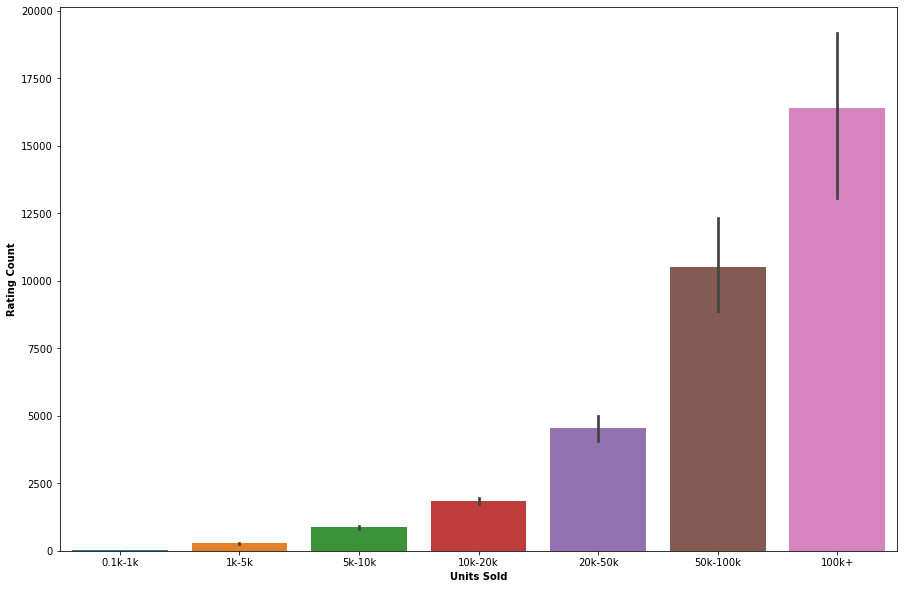

In [42]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = df.units_sold_group, y = df.rating_count, ax = ax)

units_sold_order = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
ax.set_xticklabels(units_sold_order)
ax.set_ylabel('Rating Count', fontweight = 'bold')
ax.set_xlabel('Units Sold', fontweight = 'bold')

#### Ad Boosts

In [26]:
q4 = """
SELECT count(units_sold) as Sale_with_adboosts
from df
where uses_ad_boosts = 1
UNION
SELECT count(units_sold) as Sale_without_adboosts
from df
where uses_ad_boosts = 0
"""
query4 = ps.sqldf(q4, locals())
query4

,Sale_with_adboosts
0,638
1,819


Text(0.5, 0, 'Units Sold')

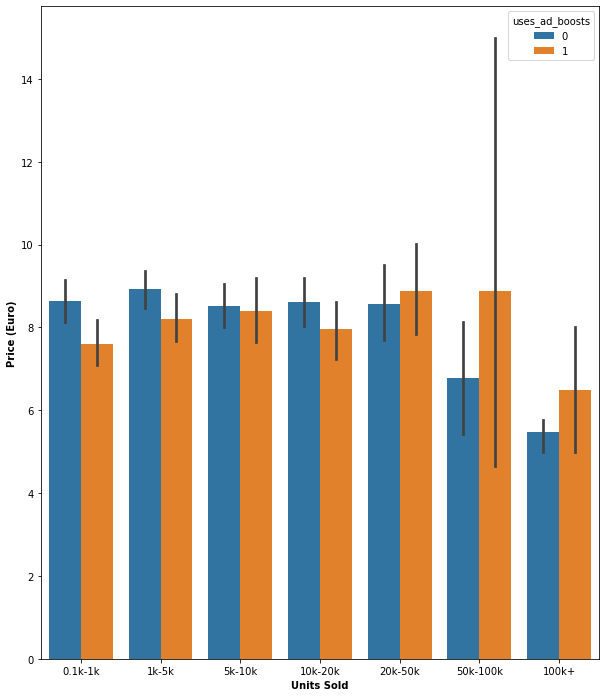

In [27]:
fig, ax = plt.subplots(figsize = (10, 12))
sns.barplot(x = 'units_sold_group', y='price', data=df, hue='uses_ad_boosts')

units_sold_order = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
ax.set_xticklabels(units_sold_order)
ax.set_ylabel('Price (Euro)', fontweight = 'bold')
ax.set_xlabel('Units Sold', fontweight = 'bold')

Insight: Ad boost has no significant impact on the sale of the products. This is a signal for the marketing team work on better and compelling campaigns. 

### Product Features

#### Size

In [28]:
q5 = """
SELECT distinct(product_variation_size_id)
from df
"""
query5 = ps.sqldf(q5, locals())
query5['product_variation_size_id'] = query5['product_variation_size_id'].apply(lambda x: x.upper())
query5 = list(query5['product_variation_size_id'])
query5

['M',
 'XS',
 'S',
 'SIZE-XS',
 'M.',
 'XXS',
 'L',
 'XXL',
 'S.',
 'S',
 'CHOOSE A SIZE',
 'XS.',
 '32/L',
 'SUIT-S',
 'XXXXXL',
 'EU 35',
 '4',
 'SIZE S.',
 '1M BY 3M',
 '3XL',
 'SIZE S',
 'XL',
 'WOMEN SIZE 36',
 'US 6.5 (EU 37)',
 'XXXS',
 'SIZE XS',
 '26(WAIST 72CM 28INCH)',
 'SIZE XXS',
 '29',
 '100 CM',
 'ONE SIZE',
 'SIZE-4XL',
 '1',
 'S/M(CHILD)',
 '2PCS',
 'XXXL',
 'S..',
 '30 CM',
 '5XL',
 '33',
 'SIZE M',
 '100 X 100CM(39.3 X 39.3INCH)',
 '2XL',
 '4XL',
 'SIZE XXS',
 'SIZE S',
 '35',
 '34',
 'SIZE-XXS',
 'S(BUST 88CM)',
 'S (WAIST58-62CM)',
 '20PCS',
 'US-S',
 'SIZE -XXS',
 'X   L',
 'XXXXL',
 '25',
 'SIZEL',
 'SIZE-S',
 'PACK OF 1',
 'S DIAMETER 30CM',
 '6XL',
 'AU PLUG LOW QUALITY',
 '5PAIRS',
 '25-S',
 'SIZE/S',
 'SIZE-5XL',
 'DAUGHTER 24M',
 'BABY FLOAT BOAT',
 '60',
 'US5.5-EU35',
 '10PCS',
 'SIZE-XXS',
 'WOMEN SIZE 37',
 '4-5 YEARS',
 'SIZE4XL',
 'FIRST  GENERATION',
 '80 X 200 CM',
 'EU39(US8)',
 'L.',
 '36',
 '04-3XL',
 'PANTS-S',
 'FLOATING CHAIR FOR KID',
 '20PCS-

In [29]:
xxs_list = []
xs_list = []
s_list = []
m_list = []
l_list = []
xl_list = []
xxl_list = []

for i in query5:
    if (i == 'XXS') or (i == 'XXXS') or (i == 'SIZE XXS') or (i == 'SIZE-XXS') or (i == 'SIZE -XXS') or (i=='XS.') or (i == 'SizeXS.'):
        xxs_list.append(i)
    elif (i == 'XS') or (i == 'XS.') or (i == 'SIZE XS') or (i == 'SIZE-XS'):
        xs_list.append(i)
    elif (i == 'S') or (i == 'S.') or (i == 'SUIT-S') or (i == 'SIZE S.') or (i == 'SIZE S') or (i == 'S..') \
    or (i == 'S(BUST 88CM)') or (i == 'S (WAIST58-62CM)') or (i == 'SIZE-S') or (i == 'S DIAMETER 30CM') or (i == '25-S') \
    or (i == 'SIZE/S') or (i == 'PANTS-S') or (i == 'SIZE--S'):
        s_list.append(i)
    elif (i == 'M') or (i == 'M.') or (i == 'SIZE M'):
        m_list.append(i)
    elif (i == 'L') or (i == '32/L') or (i == 'L.') or (i == 'SIZEL'):
        l_list.append(i)
    elif (i == 'XL') or (i == 'X   L'):
        xl_list.append(i)
    elif (i == 'XXL') or (i == 'XXXXXL') or (i == '3XL') or (i == 'SIZE-4XL') or (i == 'XXXL') or (i == '5XL') \
    or (i == '2XL') or (i == '4XL') or (i == 'XXXXL') or (i == '6XL') or (i == 'SIZE-5XL') or (i == 'SIZE4XL') \
    or (i == '04-3XL') or (i == '1 PC - XL'):
        xxl_list.append(i)
        
def size(tipe):
    if tipe in xxs_list:
        return 'XXS'
    elif tipe in xs_list:
        return 'XS'
    elif tipe in s_list:
        return 'S'
    elif tipe in m_list:
        return 'M'
    elif tipe in l_list:
        return 'L'
    elif tipe in xl_list:
        return 'XL'
    elif tipe in xxl_list:
        return 'XXL'
    else:
        return 'OTHER'
    
df['product_variation_size_id'] = df['product_variation_size_id'].apply(size)  

Product_size = pd.DataFrame(df['product_variation_size_id'].value_counts())
Product_size['product_size_per'] = Product_size['product_variation_size_id']/Product_size['product_variation_size_id'].sum()
Product_size

,product_variation_size_id,product_size_per
S,630,0.432395
XS,332,0.227865
M,196,0.134523
XXS,106,0.072752
OTHER,89,0.061084
L,50,0.034317
XXL,36,0.024708
XL,18,0.012354


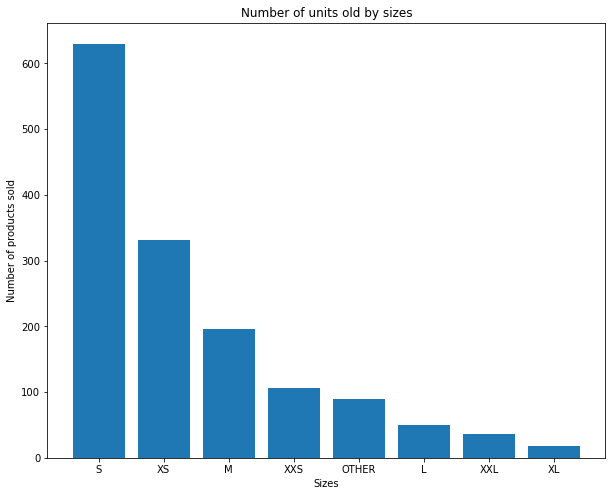

In [30]:
fig = plt.figure(figsize = (10, 8))
plt.bar(Product_size.index, Product_size.product_variation_size_id)
plt.xlabel("Sizes")
plt.ylabel("Number of products sold")
plt.title("Number of units old by sizes")
plt.show()

Insight: S is the most sold size followed by XS and M during the summer sale.

#### Color

In [31]:
q6 = """
SELECT distinct product_color
from df
"""
query6 = ps.sqldf(q6, locals())
query6 = list(query6['product_color'])
query6

['white',
 'green',
 'leopardprint',
 'black',
 'yellow',
 'navyblue',
 'blue',
 'beige',
 'grey',
 'lightblue',
 'orange',
 'red',
 'Black',
 'armygreen',
 'pink',
 'khaki',
 'red & blue',
 'blue & pink',
 'RED',
 'white & green',
 'winered',
 'black & green',
 'purple',
 'whitefloral',
 'floral',
 'fluorescentgreen',
 'orange & camouflage',
 'lightyellow',
 'coolblack',
 'multicolor',
 'camouflage',
 'lightpink',
 'pink & black',
 'silver',
 'Army green',
 'lightgreen',
 'mintgreen',
 'pink & grey',
 'gray',
 'coffee',
 'rose',
 'light green',
 'leopard',
 'black & white',
 'orange-red',
 'dustypink',
 'White',
 'star',
 'white & black',
 'apricot',
 'burgundy',
 'claret',
 'pink & white',
 'rosered',
 'navy blue',
 'wine red',
 'lightred',
 'Pink',
 'skyblue',
 'coralred',
 'brown',
 'lakeblue',
 'darkblue',
 'camel',
 'pink & blue',
 'nude',
 'Blue',
 'lightpurple',
 'army',
 'black & stripe',
 'Rose red',
 'greysnakeskinprint',
 'denimblue',
 'applegreen',
 'offwhite',
 'lightgray

In [32]:
red_list = []
green_list = []
white_list = []
black_list = []
blue_list = []
yellow_list = []
grey_list = []
purple_list = []

for i in query6:
    if (i == 'red') or (i == 'RED') or (i == 'wine red') or (i == 'rose red') or (i == "lightred") or (i == 'coralred') \
    or (i == 'watermelonred') and (i != 'white & red') and (i != 'red & blue'):
        red_list.append(i)
    elif (i == 'green') or (i == 'applegreen') or (i == 'light green') or (i == 'mintgreen') or (i == 'lightgreen') \
    or (i == 'armygreen') and (i != 'white & green') and (i != 'black & green'):
        green_list.append(i)
    elif (i == 'white') or (i == 'White') or (i == 'whitefloral') or (i == 'offwhite') or (i == 'whitestripe'):
        white_list.append(i)
    elif (i == 'black')or (i == 'Black') or (i == 'Coolblack') or (i == 'Offblack'):
        black_list.append(i)
    elif (i == 'blue') or (i == 'Blue') or (i == ' navyblue') or (i == 'navy blue') or (i == 'lightblue') or (i == 'lakeblue') and \
          (i != 'navyblue & white') and (i != 'black & blue') and (i != 'blue & pink') and (i != 'pink & blue'):
        blue_list.append(i)
    elif (i == 'Yellow') or (i == 'Lightyellow'):
        yellow_list.append(i)
    elif (i == 'Grey') or (i == 'Greysnakeskinprint') or (i == 'Lightgrey') or (i == 'Gray') or (i == 'Lightgray'):
        grey_list.append(i)
    elif 'Purple' in i:
        purple_list.append(i)
        
def color(tipe):
    if tipe in red_list:
        return 'Red'
    elif tipe in green_list:
        return 'Green'
    elif tipe in white_list:
        return 'White'
    elif tipe in black_list:
        return 'Black'
    elif tipe in blue_list:
        return 'Blue'
    elif tipe in yellow_list:
        return 'Yellow'
    elif tipe in grey_list:
        return 'Gray'
    elif tipe in purple_list:
        return 'Purple'
    else:
        return 'Other'
        
df['product_color'] = df['product_color'].apply(color)
Product_color = pd.DataFrame(df['product_color'].value_counts())
Product_color['product_color_per'] = Product_color['product_color']/Product_color['product_color'].sum()
Product_color

,product_color,product_color_per
Other,593,0.407001
Black,288,0.197666
White,240,0.164722
Green,124,0.085106
Blue,113,0.077557
Red,99,0.067948


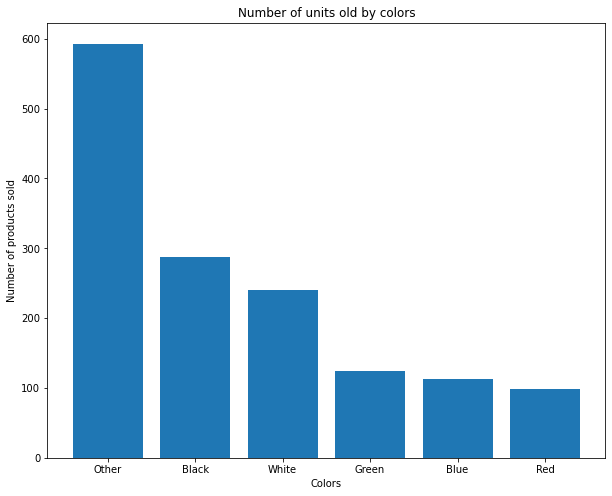

In [33]:
fig = plt.figure(figsize = (10, 8))
plt.bar(Product_color.index, Product_color.product_color)
plt.xlabel("Colors")
plt.ylabel("Number of products sold")
plt.title("Number of units old by colors")
plt.show()

Insight: From the sorted data, Black is the most demanded color (19.7%) followed by White (16.4%). The category of 'Other' colors include colors like Pink, Maroon, Gold, Brown etc.

#### Gender

In [41]:
df['title_orig'] = df['title_orig'].apply(lambda x: x.title())

man_list = []

def prod_gender(tipe):
    for i in df['title_orig']:
        if ('Man' in i) or ('Men' in i) and (i != 'Woman') :
            man_list.append(i)
    if tipe in man_list:
        return 'Man'
    else:
        return 'Woman'


df['pro_gender'] = df['title_orig'].apply(prod_gender)
df['pro_gender'].value_counts()

Woman    1369
Man        88
Name: pro_gender, dtype: int64

Insight: Roughly 94% of all the products constitute women clothes.

###  Merchant Rating

In [35]:
q7 = """
SELECT merchant_name, merchant_rating_count, merchant_rating, merchant_id   
from df
order by merchant_rating_count desc 
limit 5
"""

query7 = ps.sqldf(q7, locals())
query7

,merchant_name,merchant_rating_count,merchant_rating,merchant_id
0,simplevalueltd,2174765,4.356188,5bd0a13aa8f4bb2739445be4
1,gl,402743,4.156715,53facca81c105e3d5866e212
2,gl,402743,4.156715,53facca81c105e3d5866e212
3,bigcompany,366898,4.036081,53082ea15aefb07dfe1f2a4f
4,shanghailalanginternationaltradecoltd,330405,4.067348,53f2beb39020ee03566d6e18


In [36]:
q8 = """
SELECT title, units_sold
from df
where merchant_name = "simplevalueltd"
order by units_sold
"""

query8 = ps.sqldf(q8, locals())
query8

,title,units_sold
0,Women Sister Shirt Cute Cat Imprimé Couple d'été Débardeur Dessus Veste S-3XL,10000


Insight: Merchant 'simplevalueltd' is the highest rated merchant with a rating of 4.35 and more than 2 million counts. Their top selling product is a Cat imprint shirt for women.

Text(0.5, 0, 'Units Sold')

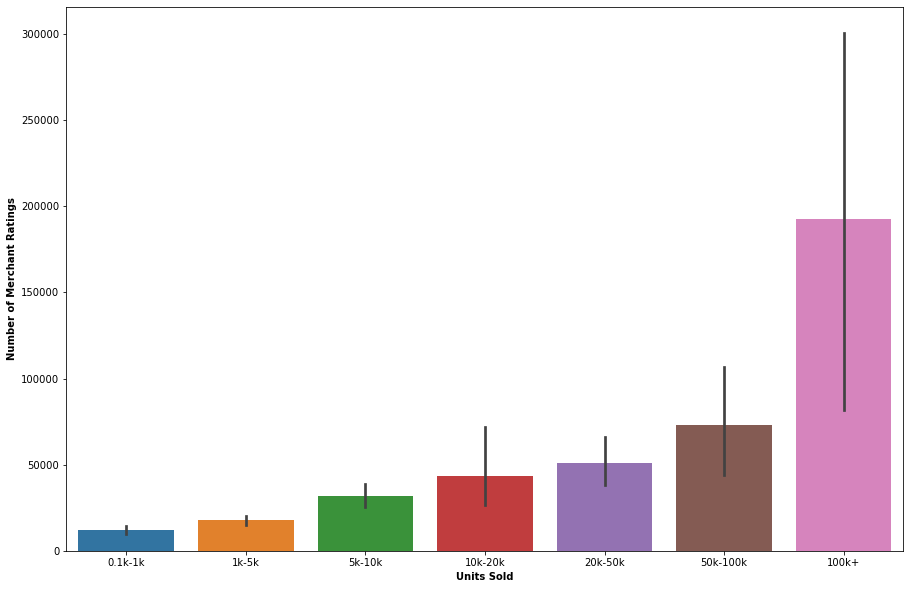

In [37]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = df.units_sold_group, y = df.merchant_rating_count, ax = ax)

units_sold_order = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
ax.set_xticklabels(units_sold_order)
ax.set_ylabel('Number of Merchant Ratings', fontweight = 'bold')
ax.set_xlabel('Units Sold', fontweight = 'bold')

Higher the number of Ratings of a Merchant, higher is the units sold for that merchant.

Text(0.5, 0, 'Units Sold')

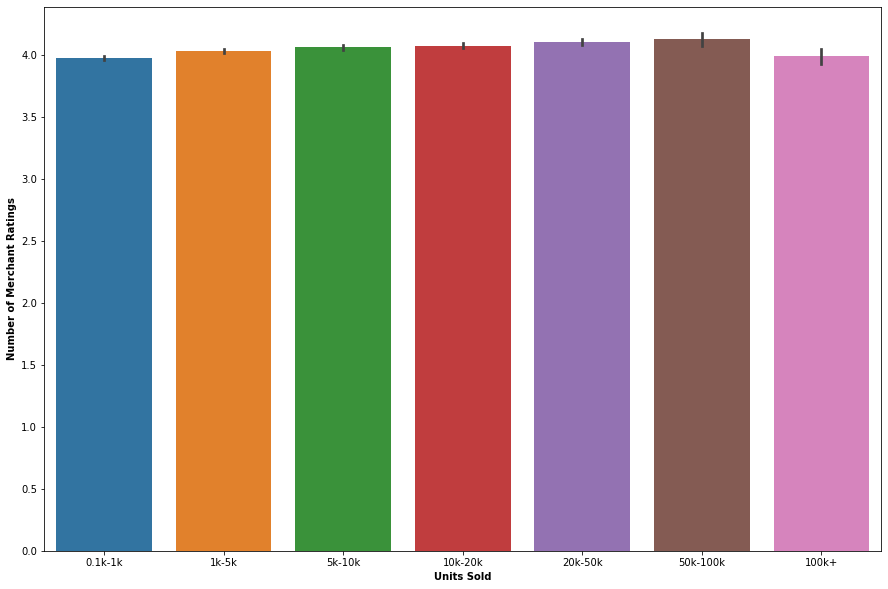

In [38]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = df.units_sold_group, y = df.merchant_rating, ax = ax)

units_sold_order = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']
ax.set_xticklabels(units_sold_order)
ax.set_ylabel('Number of Merchant Ratings', fontweight = 'bold')
ax.set_xlabel('Units Sold', fontweight = 'bold')

Products sold are the ones with merchant_rating of 4 or more. This is a indication of buyer awareness implying that customers tend to buy products from higher rated merchants only.

In [43]:
q9 = """
SELECT title as Product_Name, units_sold as Units_Sold
from df
order by units_sold desc
limit 5 
"""

query9 = ps.sqldf(q9, locals())
pd.set_option('display.max_colwidth', None)
query9

,Product_Name,Units_Sold
0,2018 New Fashion Women's Tops Sexy Strappy Sleeveless Dentelle sans manches Crop Cops,100000
1,Femmes Camisole extensible Spaghetti Strap Long Débardeur Slip Mini Dress 4Color SIZE XXL est disponible maintenant,100000
2,Nouveau Aeeival Femmes Vêtements À Manches Longues Automne Hiver Robe De Bal Robe Slim Fit Patchwork Casual Dentelle Robe Robe De Renda,100000
3,T-shirt à manches courtes en mousseline de soie rouge et blanc d'été pour femme,100000
4,Nouvelle arrivée femmes été sexy robe de soirée élégante sans manches col roulé mini robe,100000
